# Video processing:
capturing, writing/saving in a file, flipped video

 Shreya Tripathi (2BAI10033)

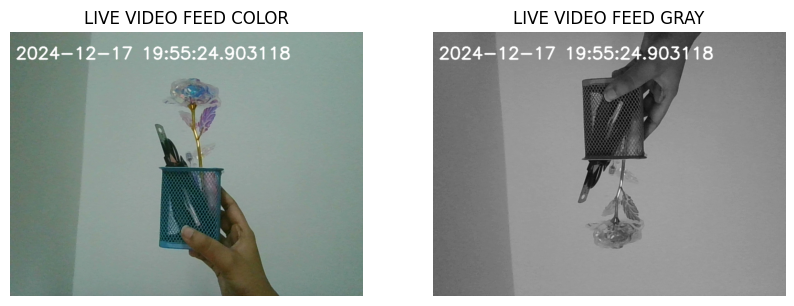

Press 'q' and Enter to stop the video feed (or press Enter to continue): q


<Figure size 640x480 with 0 Axes>

In [1]:
import cv2
import datetime
import matplotlib.pyplot as plt

# Define font for overlay text
font = cv2.FONT_HERSHEY_SIMPLEX

# Define video codec and create VideoWriter objects
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
out = cv2.VideoWriter('output.avi', fourcc, 50.0, (640, 480))  # Color video
out1 = cv2.VideoWriter('output1.avi', fourcc, 10.0, (640, 480))  # Grayscale video

# Open the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam opened successfully
if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

# Main loop for capturing and processing video
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Get current date and time
    datet = str(datetime.datetime.now())

    # Add the date and time to the color frame
    frame_with_text = cv2.putText(frame.copy(), datet, (10, 50), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Flip only the grayscale frame vertically
    gray_flipped = cv2.flip(gray, 0)

    # Add the date and time to the flipped grayscale frame
    gray_with_text = cv2.putText(gray_flipped, datet, (10, 50), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display the video feeds using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("LIVE VIDEO FEED COLOR")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(frame_with_text, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB

    plt.subplot(1, 2, 2)
    plt.title("LIVE VIDEO FEED GRAY")
    plt.axis('off')
    plt.imshow(gray_with_text, cmap='gray')

    plt.pause(0.01)
    plt.clf()  # Clear the plot for the next frame

    # Write frames to the video files
    out.write(frame_with_text)
    out1.write(cv2.cvtColor(gray_with_text, cv2.COLOR_GRAY2BGR))  # Save grayscale as a BGR frame for video compatibility

    # # Break the loop when 'q' is pressed
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
    # Add a manual stop condition
    stop = input("Press 'q' and Enter to stop the video feed (or press Enter to continue): ")
    if stop == 'q':
        break

# Release video capture and writer objects
cap.release()
out.release()
out1.release()


---
This code captures live video from the webcam and processes it to display two feeds side-by-side using Matplotlib: a color feed with the current date and time overlay and a grayscale, vertically flipped feed with the same timestamp. The video frames are saved to two separate AVI files (color and grayscale). The display refreshes dynamically for each frame, and the program continues until the user manually types 'q' to stop.